<a href="https://colab.research.google.com/github/GabriellFelipe07/Prediction_RedWineQuality/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Wine Quality**

Autor: Gabriel Felipe Machado de Oliveira, 2021

## 1. Introdução: Formulação do problema

O presente projeto tem como objetivo estudar as diversas etapas de um projeto de Ciência de Dados utilizando uma base dedos real.

Considerando a base de dados que relata a qualidade de vinhos temos 11 atributos de entrada (baseados em análises físico-químicas) e 1 atributo de saída, são eles:
1. Fixed Acidity: Indicador de acidez;
2. Volatile Acidity: Indicador de volatilidade;
3. Citric Acid: Indicador de acidez cítrica;
4. Residual Sugar: Indica a quantidade de açucar natural após a frementação;
5. Chlorides: Indica a quantidade de Cloretos na bebida;
6. Free Sulfur Dioxide: Indica a quantidade de enxofre livre;
7. Total Sulfur Dioxide: Indica a quantidade de enxofre total;
8. Density: Dendidade da bebida;
9. pH: pH da bebida;
10. Sulphates: Indicador de sulfatos na bebida;
11. Alcohol: Indicador de álcool na bebida;
12. Quality: Pontuação do vinho que varia de 1 a 10.

O objetivo é classificar a qualidade do vinho com base no conjunto de atributos de entrada.

## 2. Leitura dos Dados

Importando o módulo Pandas e Numpy para leitura e preparação dos dados, e outros módulo que serão necessários, vamos ler e exibir o conjunto dados que usaremos.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('winequality-red.csv') #Importando a base de dados
data.head() #Mostrando as 5 primeiras linhas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe() #Descrevendo estatisticamente os atributos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info() #Verificando valores vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



Podemos ver que não há valores nulos, logo não será necessário realizar a limpeza. Considerando as diferentes escalas dos atributos, vamos realizar o processo de normalização.

In [ ]:
from sklearn.preprocessing import StandardScaler

datanp = data.to_numpy() #Transformando para NumPy
nrow, ncol = data.shape

Y = datanp[:,0]
X = datanp[:,1:ncol]

#Normalizando os dados
scaler = StandardScaler().fit(X) 
X = scaler.transform(X)

print('Dados Transformados:')
print('Media:', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))


Dados Transformados:
Media: [ 1.73303106e-16 -8.88733878e-17 -1.24422743e-16  3.82155568e-16
 -6.22113715e-17  4.44366939e-17 -3.47317200e-14  2.86172309e-15
  6.75437748e-16  1.06648065e-16  8.88733878e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3. Análise Exploratória e Estatística Descritiva

Nesse momente, focaremos em analisar qual a influência/relação de nossos atributos em nossa classe. Dessa forma, usaremos funções e métodos do Matploblib e do Seaborn para nos auxiliar.

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

Primeiro, vamo analizar as frequâncias de valores utilizando Histogramas para cada atributo e para a classe.

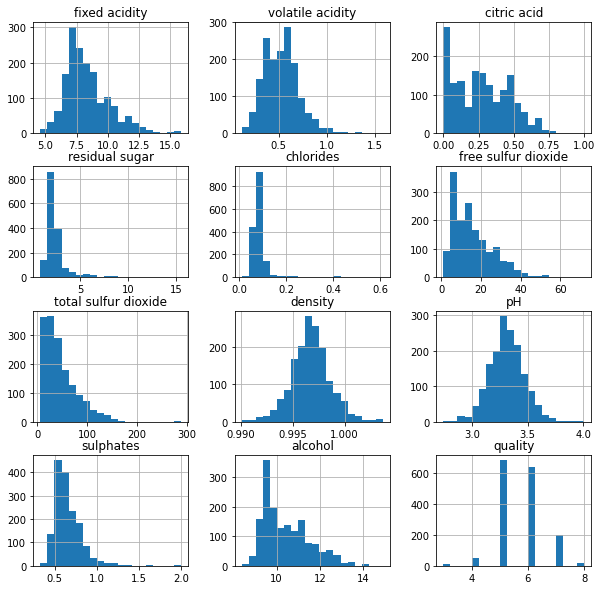

In [ ]:
data.hist(bins = 20, figsize = (10,10)) #Gerando Histogramas para os atributos
plt.show() #Plotando

Percebamos que a maioris dos atributos tendem a uma dsistribuição Normal, e ainda que a nossa classe "Quality" possui como valores mais frquentes o 5 e o 6.

Agora, analisemos a possiveis correlações e dependências dos atributos, utilizando um mapa de calor.

<function matplotlib.pyplot.show(close=None, block=None)>

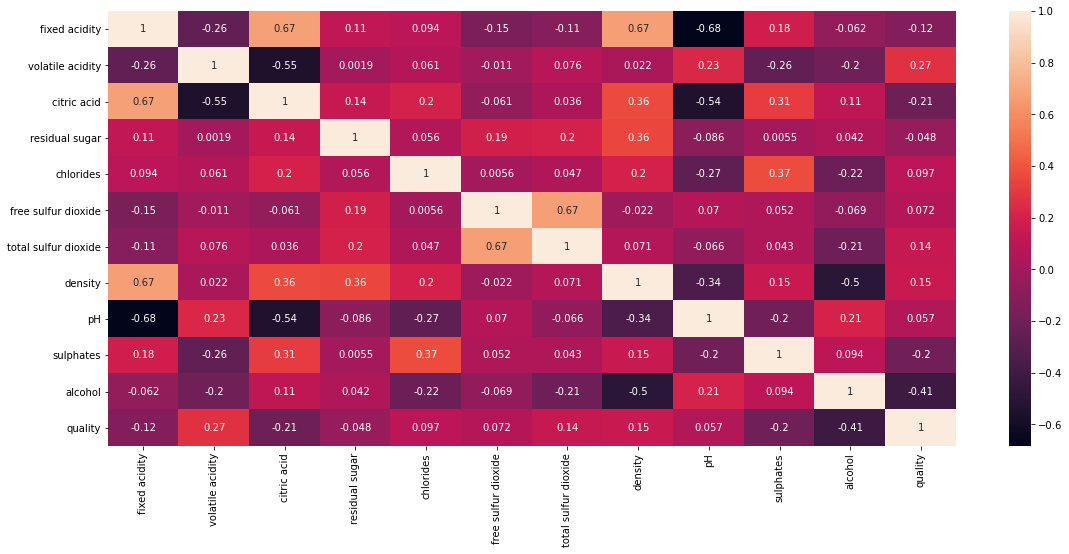

In [ ]:
#Configurando o tamanho do gráfico, inicializando e printando o mapa de calor dos atributos
plt.figure(figsize = (19,8))
sb.heatmap(data.corr(), annot = True)
plt.show()

Podemos ainda fazermos Boxplots de cada atributos condicionado a classe, a fim de inferirmos possíveis correlaçoões.

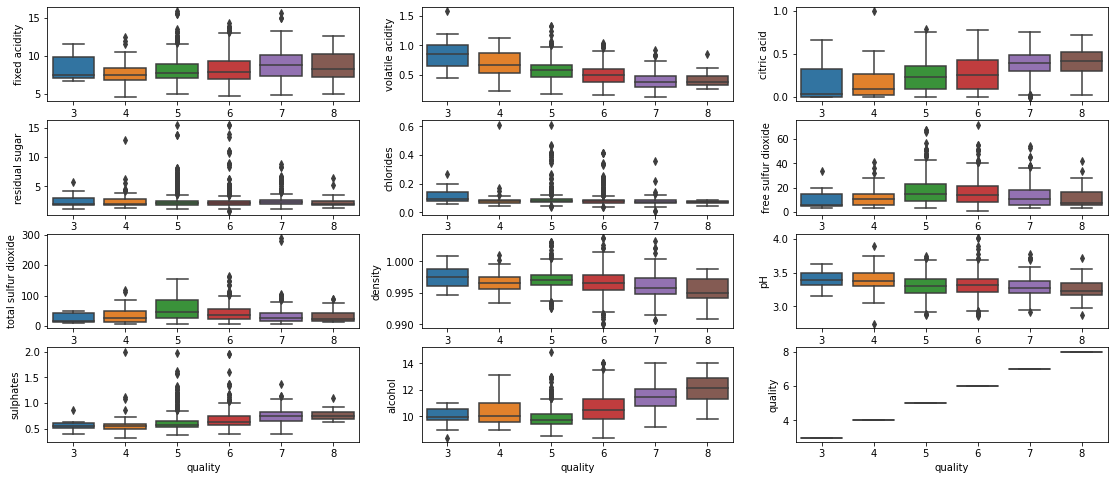

In [ ]:
colunas = data.columns
cont = 1
plt.figure(figsize = (19,8))

#Para cada atributo condicionamos o Boxplot para a classe
for coluna in colunas:
    plt.subplot(4,3,cont)
    sb.boxplot(x = 'quality', y = coluna, data = data)
    cont += 1

plt.show()

Agora, vamos a possíveis conclusões: os atributos 'Alcohol', 'Sulphates' e 'Citric Acid' tendem a influenciar positivamente a qualidade do vinho quando em grandes quantidades; os atributos 'acidity', 'pH' e 'density', quando em grandes quantidades, tendem a influenciar negativamente na qualidade do vinho.

## 4. Preparação e Normalização dos Dados

Antes ainda da seleção do modelo de aprendizado, temos algumas alterações a serem realizadas. Precisamo determinar algumas variáveis categóricas para nos auxiliarem na predição dos dados e ainda, realizar a normalização dos atributos para eliminarmos possiíveis efeitos das diferentes escalas consideradas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Categorizando os tipos de vinhos cm ruim e bom
valores = (2, 6.5, 8)
grupos = ['ruim', 'bom']
data['quality'] = pd.cut(data['quality'], bins = valores, labels = grupos)

In [ ]:
label_quality = LabelEncoder() #Iniciando a função de categorização

In [ ]:
data['quality'] = label_quality.fit_transform(data['quality']) #Categoriando com 0 ou 1

In [ ]:
data['quality'].value_counts() #Analisando a categorizações

1    1382
0     217
Name: quality, dtype: int64

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
#Dividindo o dataset entre atributos (X) e classe (Y)
X = data.drop('quality', axis = 1)
y = data['quality']

In [ ]:
#Separando o conjunto de teste (2% do total) e o conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [ ]:
#Normalização dos dados e treinamento dos conjuntos
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 5. Treinamento e Avaliação dos Modelo e Predições

Temos inúmeros modelos de clasificação como opção para classifiarmos os vinhos. Entretanto, testaremos o Random Forest Classifier e o Stochastic Gradient Decent Classifier

### Random Forest Classifier

In [ ]:
#Inicialização do modelo, treinamento e predição
RandomFC = RandomForestClassifier(n_estimators = 200)
RandomFC.fit(X_train, y_train)
pred_RandomFC = RandomFC.predict(X_test)

#Printando a acurácia da predição
print(classification_report(y_test, pred_RandomFC))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        47
           1       0.91      0.96      0.94       273

    accuracy                           0.89       320
   macro avg       0.79      0.71      0.74       320
weighted avg       0.88      0.89      0.88       320



Conseguimos uma acurácia de 88% no conjuto de teste.

### Stochastic Gradient Decent Classifier

In [ ]:
#Inicialização do modelo, treinamento e predição
StochasticGDC = SGDClassifier(penalty = None)
StochasticGDC.fit(X_train, y_train)
pred_StochasticGDC = StochasticGDC.predict(X_test)

#Printando a acurácia da predição
print(classification_report(y_test, pred_StochasticGDC))

              precision    recall  f1-score   support

           0       0.40      0.49      0.44        47
           1       0.91      0.87      0.89       273

    accuracy                           0.82       320
   macro avg       0.65      0.68      0.66       320
weighted avg       0.83      0.82      0.82       320



Utilizando o Stochastic Gradient Decent Classifier conseguimos uma acurácia de 83%.

## 6. Interpretação dos Resultados

Dado que dividimos a classe entre 0 e 1, como categorias de bom e ruim, colocamos dois modeos de classificação para fazerem as respectivas predições de qualidade dos vinhos. Concluímos que o modelo que melhor performa nesse contexto é o Random Forest Classifier, na qual alcançou uma acurácia de 88% no conjunto de teste, isto é, acertou a maioria da qualidade dos vinhos no conjnto de teste, após treinar com o conjunto de treinamento.

Portanto, segue que o Random Forest Classifier é o melhor modelo de Machine Learning entre os dois testados, para predizer qualidade de vinhos de um conjunto de dados.